In [46]:
# Import necessary libraries
import os
import geopandas as gpd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
import rioxarray

In [2]:
# Set the working directory
os.chdir('D:/LabTogo/TechnicalAssessment/')
# Create the products directory if it doesn't exist
os.makedirs('products', exist_ok=True)

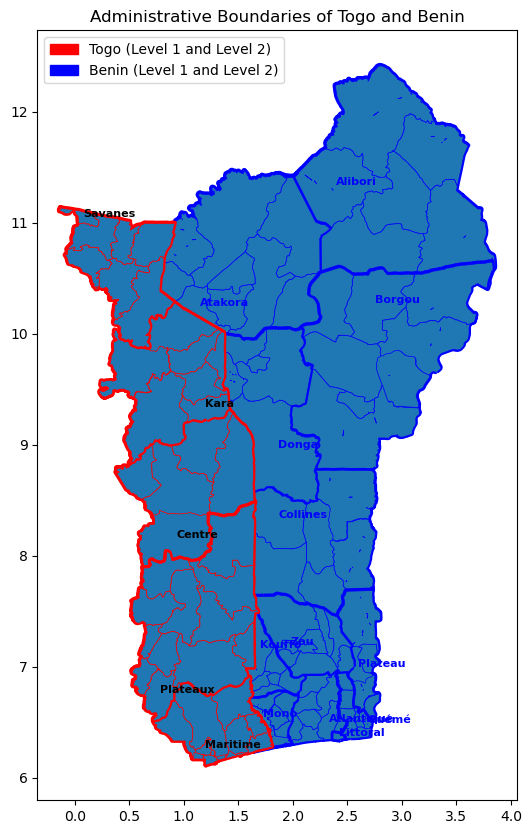

In [9]:

# Task 1.1: Import and merge administrative boundary files for Togo and Benin
# Load the GeoJSON files for Togo and Benin
togo = gpd.read_file('data/administrative_boundaries/gadm41_TGO_2.geojson')
benin = gpd.read_file('data/administrative_boundaries/gadm41_BEN_2.geojson')

# Merge the administrative boundaries
boundaries = pd.concat([togo, benin])

# Plot administrative polygons with different colors for each country
fig, ax = plt.subplots(figsize=(10, 10))
for country, data in boundaries.groupby('COUNTRY'):
    color = 'red' if country == 'Togo' else 'blue'
    for level_1, group_1 in data.groupby('NAME_1'):
        group_1.plot(ax=ax, edgecolor=color, linewidth=3.5)
        for level_2, group_2 in group_1.groupby('NAME_2'):
            group_2.plot(ax=ax, edgecolor=color, linewidth=0.5)

# Add labels for regions 
labeled_regions = set()
for idx, row in boundaries.iterrows():
    if row['NAME_1'] not in labeled_regions:
        color = 'black' if row['COUNTRY'] == 'Togo' else 'blue'
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, s=row['NAME_1'], fontsize=8, color=color, weight='bold')
        labeled_regions.add(row['NAME_1'])
        
plt.title('Administrative Boundaries of Togo and Benin')
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Togo (Level 1 and Level 2)')
blue_patch = mpatches.Patch(color='blue', label='Benin (Level 1 and Level 2)')
plt.legend(handles=[red_patch, blue_patch], loc='upper left')
plt.savefig('products/1.1.jpeg')
plt.show()

# Task 1.2: Import and explore maize yield data
# Load maize yield data

In [31]:
yield_data = pd.read_csv('data/administrative_yield/fews_net_yield_TGO_BEN.csv')



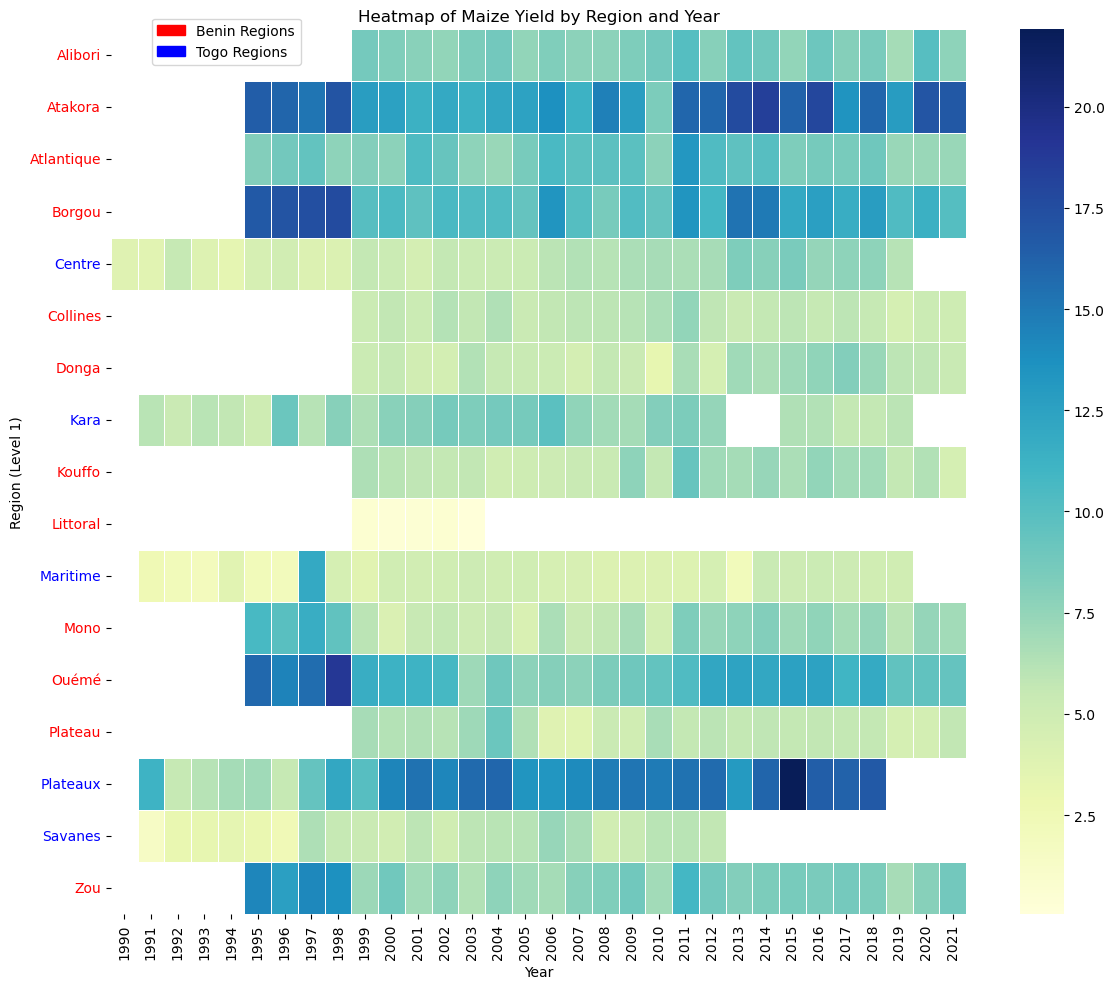

In [32]:
# Create a pivot table for the heatmap
yield_pivot = yield_data.pivot_table(index='admin_1', columns='year', values='value',aggfunc='sum')

# Plot heatmap of maize yield by region and year
plt.figure(figsize=(12, 10))
plt.title('Heatmap of Maize Yield by Region and Year')
ax = sns.heatmap(yield_pivot, cmap='YlGnBu', annot=False, linewidths=.5)
plt.xlabel('Year')
plt.ylabel('Region (Level 1)')

# Customize region label colors based on country
for text in ax.get_yticklabels():
    region_name = text.get_text()
    country = yield_data[yield_data['admin_1'] == region_name]['country'].iloc[0]
    text.set_color('red' if country == 'Benin' else 'blue')

red_patch = mpatches.Patch(color='red', label='Benin Regions')
blue_patch = mpatches.Patch(color='blue', label='Togo Regions')
plt.legend(handles=[red_patch, blue_patch], loc='upper left', bbox_to_anchor=(0.04, 1.02))
plt.tight_layout()
plt.savefig('products/1.2.png')
plt.show()


Analyse des Productions de Maïs par Région et Année

La heatmap présente la production totale de maïs en fonction des régions et des années pour le Bénin et le Togo. Voici une interprétation détaillée de ces données et des éléments qu'elles mettent en évidence.

Variations par Région

Les régions du Bénin sont indiquées en rouge et celles du Togo en bleu.

Certaines régions comme Borgou, Atakora, et Plateaux affichent une production totale plus élevée que les autres, représentée par des couleurs plus sombres. Cela suggère une forte contribution de ces régions à la production globale de maïs.

D'autres régions, comme Collines, Littoral, et Kouffo, ont des productions plus faibles au fil des années, ce qui peut indiquer des défis spécifiques ou des contraintes agricoles limitant leur productivité.

Tendances Temporelles

On observe des variations importantes d'une année à l'autre pour chaque région :

Les années 1996-1997 semblent avoir été marquées par une production relativement élevée dans plusieurs régions du Bénin, telles que Borgou et Ouémé.

La région des Plateaux montre des niveaux de production significativement élevés pendant les années 1995 et 2006-2011, suggérant des conditions favorables ou des politiques agricoles bénéfiques pendant ces périodes.

Certaines années présentent des cellules claires (faibles productions) ou des cellules blanches (valeurs manquantes), ce qui peut indiquer des conditions défavorables pour la culture ou un manque de données disponibles.

Valeurs Manquantes

Des cellules blanches apparaissent sur la heatmap, signalant des valeurs manquantes. Cela peut être dû à des problèmes logistiques dans la collecte des données, des événements climatiques imprévus, ou l'absence de suivi agricole.

Les valeurs manquantes doivent être prises en compte, car elles peuvent biaiser l'interprétation globale de la production. Une méthode d'imputation pourrait être envisagée pour compléter les données manquantes et fournir une analyse plus cohérente.

Comparaison entre Pays

Globalement, le Bénin semble avoir une production plus élevée comparée au Togo, en particulier dans des régions comme Borgou et Atakora. Ces régions se distinguent par des niveaux de production soutenus, ce qui pourrait indiquer des pratiques agricoles mieux établies ou des conditions environnementales plus favorables.

En revanche, certaines régions togolaises comme Plateaux montrent une production élevée sur certaines périodes, mais avec plus de fluctuations que les régions béninoises.

Conclusion

Performances Régionales : Les régions comme Borgou, Atakora, et Plateaux se démarquent par leur forte contribution à la production totale de maïs. Les régions ayant des productions plus faibles, telles que Collines et Kouffo, pourraient bénéficier d'interventions ciblées pour augmenter leur productivité.

Influence des Conditions Climatiques et Pratiques Agricoles : Les variations observées dans les niveaux de production peuvent être dues à des facteurs tels que les conditions climatiques, la qualité des sols, ou les pratiques agricoles. Des analyses complémentaires, notamment avec des données climatiques, permettraient de mieux comprendre ces différences.

Valeurs Manquantes : Les données manquantes doivent être traitées pour éviter des biais dans l'analyse. L'utilisation de méthodes d'imputation pourrait aider à compléter les années sans données disponibles.

Recommandations

Interventions Spécifiques : Les régions ayant une production plus faible devraient être soutenues par des programmes d'amélioration agricole, tels que des formations sur les techniques de culture et l'introduction de variétés de maïs plus productives.

Renforcement de la Collecte de Données : Améliorer la collecte de données dans les régions avec des valeurs manquantes permettrait d'obtenir une vision plus complète et précise des performances agricoles.

Analyse Climatique : L'intégration de données climatiques dans l'analyse des rendements et de la production fournirait des informations précieuses pour anticiper les impacts du changement climatique sur la productivité et guider les interventions futures.

Cette heatmap offre un aperçu efficace des disparités régionales et temporelles de la production de maïs, ce qui est essentiel pour orienter les interventions politiques et agricoles en Afrique de l'Ouest.

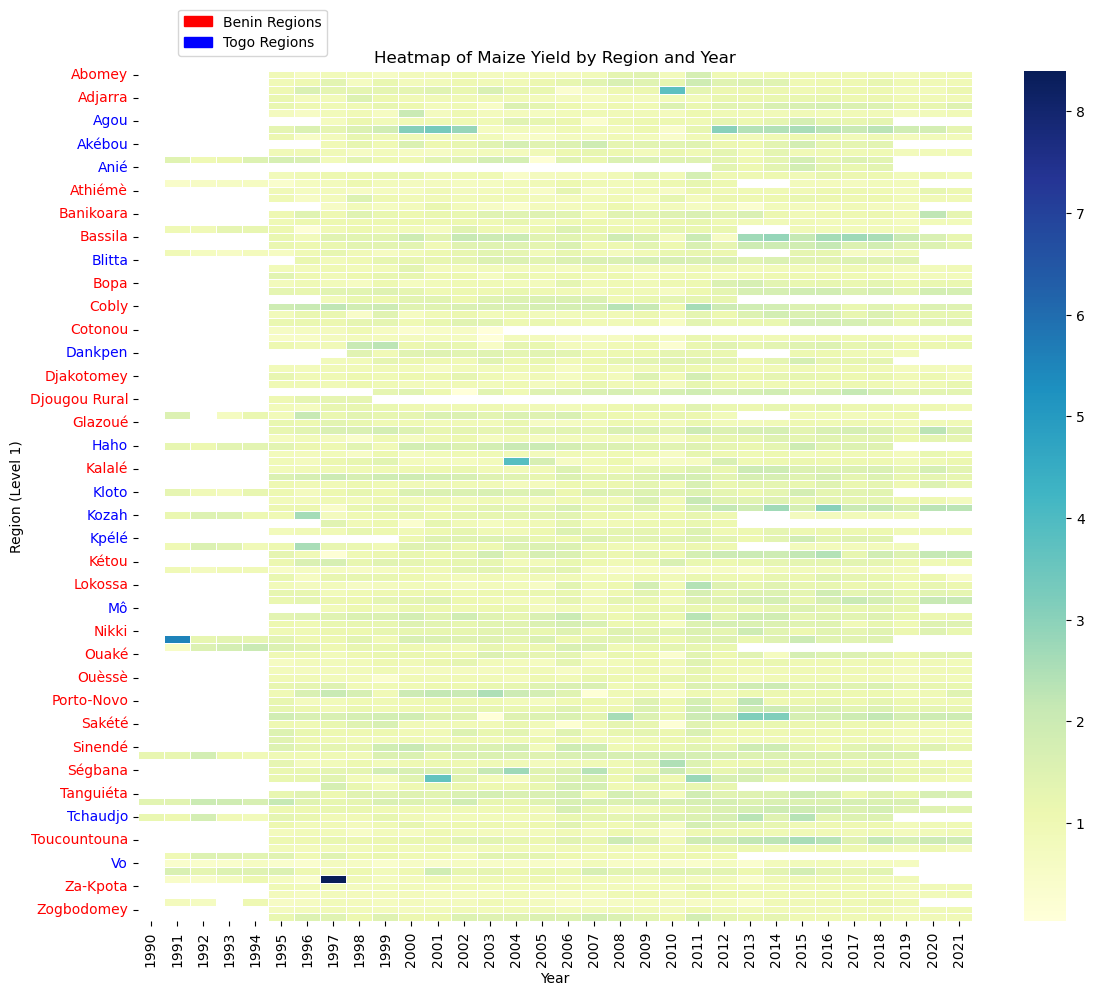

In [34]:
# Create a pivot table for the heatmap
yield_pivot = yield_data.pivot_table(index='admin_2', columns='year', values='value')

# Plot heatmap of maize yield by region and year
plt.figure(figsize=(12, 10))
plt.title('Heatmap of Maize Yield by Region and Year')
ax = sns.heatmap(yield_pivot, cmap='YlGnBu', annot=False, linewidths=.5)
plt.xlabel('Year')
plt.ylabel('Region (Level 1)')

# Customize region label colors based on country
for text in ax.get_yticklabels():
    region_name = text.get_text()
    country = yield_data[yield_data['admin_2'] == region_name]['country'].iloc[0]
    text.set_color('red' if country == 'Benin' else 'blue')

red_patch = mpatches.Patch(color='red', label='Benin Regions')
blue_patch = mpatches.Patch(color='blue', label='Togo Regions')
plt.legend(handles=[red_patch, blue_patch], loc='upper left', bbox_to_anchor=(0.04, 1.08))
plt.tight_layout()
plt.savefig('products/1.2a.png')
plt.show()

# Task 1.4: Import MODIS VI data

In [165]:
vi_data = xr.open_dataset('data/modis_vegetation_indices/modis_vi.nc', engine='netcdf4')
print(vi_data['NDVI'].attrs)


{'add_offset_err': 0, 'calibrated_nt': 5, 'long_name': 'CMG 0.05 Deg Monthly NDVI', 'scale_factor_err': 0, 'units': 'NDVI', 'valid_range': '-2000, 10000', 'grid_mapping': 'spatial_ref'}


- valid_range: -2000, 10000 : Cela signifie que les valeurs de NDVI dans le fichier NetCDF sont dans cette plage avant la mise à l'échelle.
- Pas de scale_factor spécifié : Il semble que les métadonnées ne contiennent pas d'attribut scale_factor. 
- Dans ce cas, vous devrez peut-être définir le facteur de mise à l'échelle en fonction des valeurs de valid_range.

In [166]:
vi_data = xr.open_dataset('data/modis_vegetation_indices/modis_vi.nc', engine='netcdf4')

# Apply scale factor to NDVI and EVI values
scale_factor = 0.0001
vi_data['NDVI'] = vi_data['NDVI'] * scale_factor * scale_factor
vi_data['EVI'] = vi_data['EVI'] * scale_factor * scale_factor

# Mask fill values for NDVI and EVI
fill_value = -3000 * scale_factor
vi_data['NDVI'] = vi_data['NDVI'].where(vi_data['NDVI'] != fill_value)
vi_data['EVI'] = vi_data['EVI'].where(vi_data['EVI'] != fill_value)

C:\Users\YOuedraogo\AppData\Local\Temp\ipykernel_53900\1133058794.py:6: FutureWarning: It is recommended to use 'rio.write_crs()' instead. 'rio.set_crs()' will likelybe removed in a future release.
  ndvi.rio.set_crs(boundaries.crs, inplace=True)


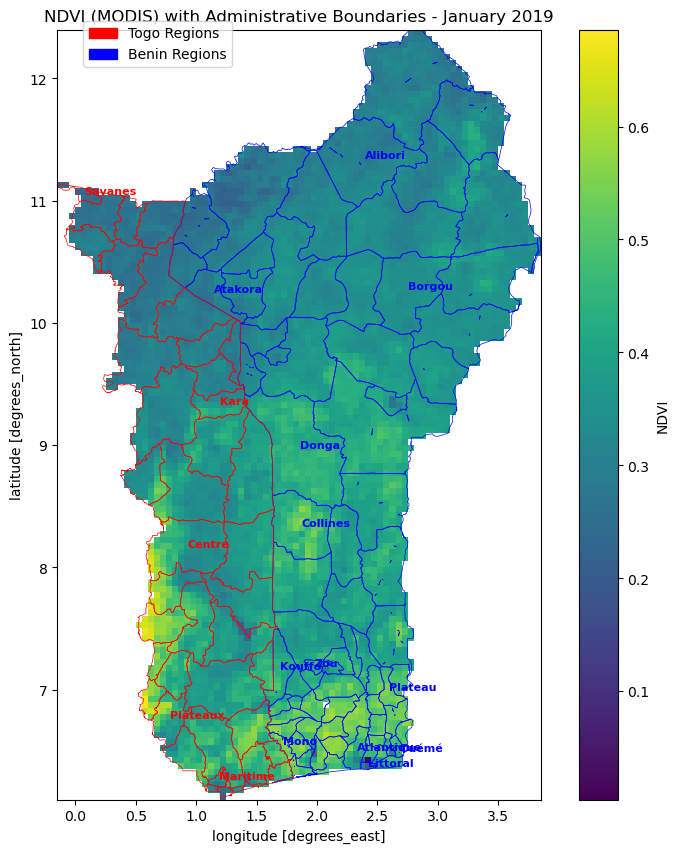

In [167]:

# Extract NDVI data for a specific year and month (e.g., January 2019)
ndvi = vi_data['NDVI'].sel(time='2019-01')

# Plot a vegetation index layer
fig, ax = plt.subplots(figsize=(10, 10))
ndvi.rio.set_crs(boundaries.crs, inplace=True)
ndvi_clipped = ndvi.rio.clip(boundaries.geometry, drop=True)
ndvi_clipped.plot(ax=ax, cmap='viridis')

# Plot administrative boundaries with different colors for each country
for country, data in boundaries.groupby('COUNTRY'):
    color = 'red' if country == 'Togo' else 'blue'
    data.boundary.plot(ax=ax, edgecolor=color, linewidth=0.5)

# Add labels for regions (avoid repeating labels for level 2 regions)
labeled_regions = set()
for idx, row in boundaries.iterrows():
    if row['NAME_1'] not in labeled_regions:
        color = 'red' if row['COUNTRY'] == 'Togo' else 'blue'
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, s=row['NAME_1'], fontsize=8, color=color, weight='bold')
        labeled_regions.add(row['NAME_1'])

plt.title('NDVI (MODIS) with Administrative Boundaries - January 2019')
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Togo Regions')
blue_patch = mpatches.Patch(color='blue', label='Benin Regions')
plt.legend(handles=[red_patch, blue_patch], loc='upper left', bbox_to_anchor=(0.04, 1.02))
plt.savefig('products/1.4_ndvi_with_boundaries.png')
plt.show()

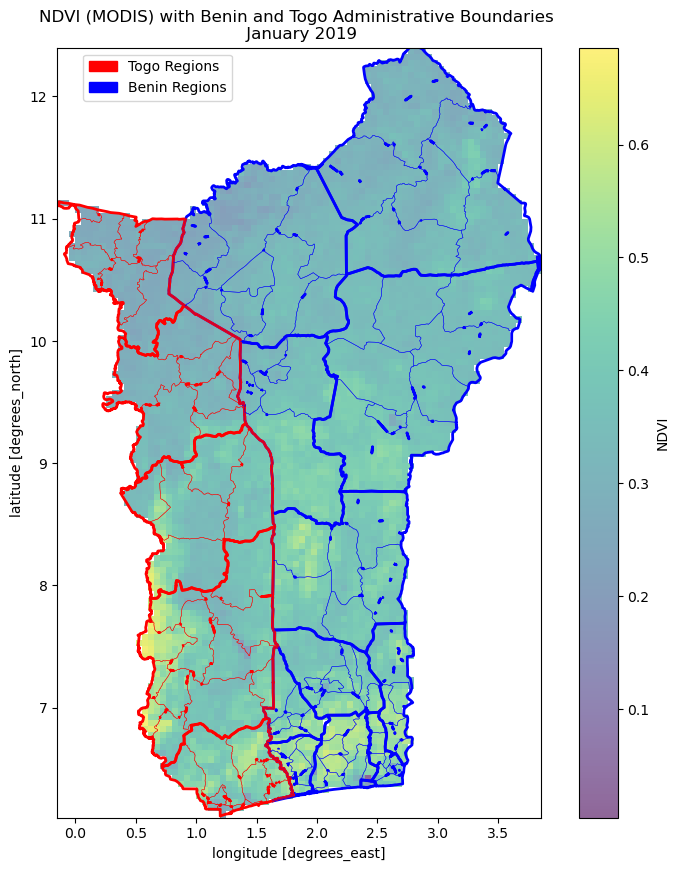

In [169]:
# Extract NDVI data for a specific year and month (e.g., January 2019)
ndvi = vi_data['NDVI'].sel(time='2019-01')

#Ensure CRS consistency between NDVI and boundaries
ndvi = ndvi.rio.write_crs(boundaries.crs, inplace=True)

# Clip NDVI to the boundaries of Togo and Benin
ndvi_clipped = ndvi.rio.clip(boundaries.geometry, drop=True)

# Plot NDVI with level 1 and level 2 boundaries
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the clipped NDVI data
ndvi_clipped.plot(ax=ax, cmap='viridis', alpha=0.6)

# Plot level 1 boundaries
level_1_boundaries = boundaries.dissolve(by='NAME_1')
for country, data in level_1_boundaries.groupby('COUNTRY'):
    color = 'red' if country == 'Togo' else 'blue'
    data.boundary.plot(ax=ax, edgecolor=color, linewidth=2)

# Plot level 2 boundaries
level_2_boundaries = boundaries.dissolve(by='NAME_2')
for country, data in level_2_boundaries.groupby('COUNTRY'):
    color = 'red' if country == 'Togo' else 'blue'
    data.boundary.plot(ax=ax, edgecolor=color, linewidth=0.3)

plt.title('NDVI (MODIS) with Benin and Togo Administrative Boundaries \n January 2019')
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Togo Regions')
blue_patch = mpatches.Patch(color='blue', label='Benin Regions')
plt.legend(handles=[red_patch, blue_patch], loc='upper left', bbox_to_anchor=(0.04, 1.0))
plt.savefig('products/1.4.png')
plt.show()

# Task 2: Geospatial Data Wrangling

## 2.1 Extract vegetation features from the VI data.

In [181]:
# Ensure CRS consistency between VI data and boundaries
vi_data = vi_data.rio.write_crs(boundaries.crs, inplace=True)

# Initialize a list to store extracted features
features = []

# Extract mean, min, and max values for each level polygon
for month in pd.date_range(start='2002-01', end='2024-07', freq='M'):
    for vi in ['NDVI', 'EVI']:
        # Attempt to match the time in the dataset using method='pad'
        try:
            vi_month = vi_data[vi].sel(time=month, method='pad')
        except KeyError:
            continue  # If the month is not found, skip

        vi_clipped = vi_month.rio.clip(boundaries.geometry, drop=True)
        
        for idx, row in boundaries.iterrows():
            # Mask the polygon
            masked = vi_clipped.rio.clip([row.geometry], drop=True)
            mean_val = masked.mean().values.item() if masked.size > 0 else np.nan
            min_val = masked.min().values.item() if masked.size > 0 else np.nan
            max_val = masked.max().values.item() if masked.size > 0 else np.nan
            
            features.append({
                'year': month.year,
                'month': month.month,
                'country': row['COUNTRY'],
                'name_1': row['NAME_1'],
                'name_2': row['NAME_2'],
                'vi': vi,
                'mean': mean_val,
                'min': min_val,
                'max': max_val
            })

# Convertion to DataFrame
features_df = pd.DataFrame(features)
features_df.to_csv('products/features_data.csv', index=False)


In [182]:
features_df

,year,month,country,name_1,name_2,vi,mean,min,max
0,2002,7,Togo,Centre,Blitta,NDVI,0.744607,0.6564,0.8341
1,2002,7,Togo,Centre,Mô,NDVI,0.759922,0.7016,0.8259
2,2002,7,Togo,Centre,Sotouboua,NDVI,0.723608,0.6231,0.8154
3,2002,7,Togo,Centre,Tchamba,NDVI,0.731899,0.6247,0.7943
4,2002,7,Togo,Centre,Tchaudjo,NDVI,0.720066,0.5833,0.7863
...,...,...,...,...,...,...,...,...,...
62299,2024,6,Benin,Zou,Djidja,EVI,0.466551,0.3798,0.5362
62300,2024,6,Benin,Zou,Ouinhi,EVI,0.480658,0.4514,0.5194
62301,2024,6,Benin,Zou,Za-Kpota,EVI,0.455743,0.3759,0.5018
62302,2024,6,Benin,Zou,Zagnanado,EVI,0.513294,0.3968,0.5859


C:\Users\YOuedraogo\AppData\Local\Temp\ipykernel_53900\953347574.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


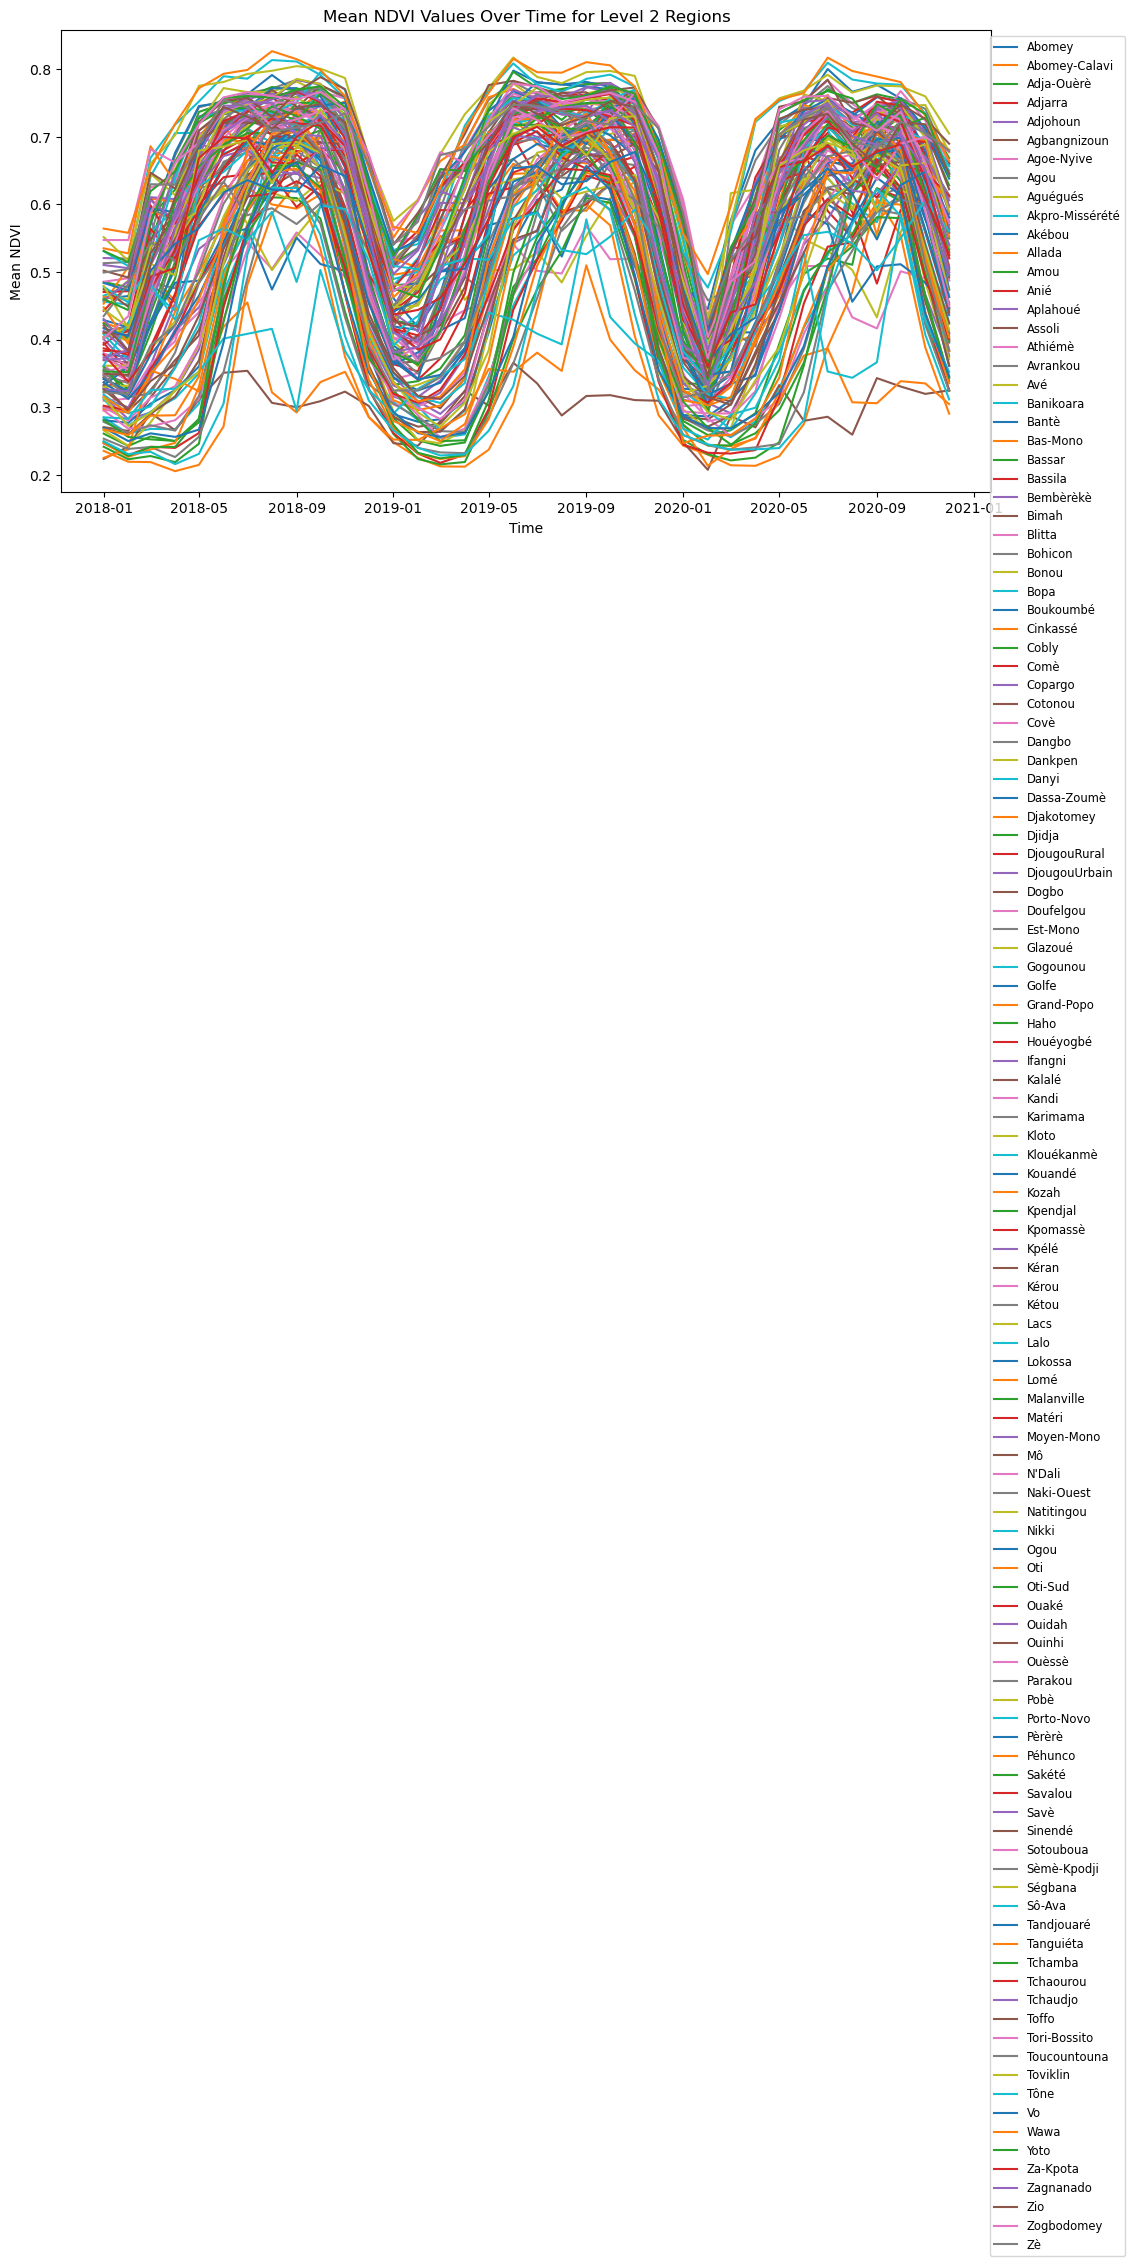

In [183]:

# Create a visualization: Mean NDVI values over months for each level 2 region for selected years
selected_years = [2018, 2019,2020]
mean_ndvi_df = features_df[(features_df['vi'] == 'NDVI') & (features_df['year'].isin(selected_years))].groupby(['year', 'month', 'name_2'])['mean'].mean().reset_index()



# Plotting mean NDVI values
fig, ax = plt.subplots(figsize=(12, 6))
for name_2, group in mean_ndvi_df.groupby('name_2'):
    ax.plot(pd.to_datetime(group[['year', 'month']].assign(day=1)), group['mean'], label=name_2)

plt.title('Mean NDVI Values Over Time for Level 2 Regions')
plt.xlabel('Time')
plt.ylabel('Mean NDVI')
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.savefig('products/mean_ndvi_over_time.png')
plt.show()

## 2.2 Reshape the extracted data into a wide format such that there is a single row for each unique combination of country, administrative level 1, administrative level 2, and year.

In [184]:
# Reshape the extracted data into wide format
wide_df = features_df.pivot_table(index=['country', 'name_1', 'name_2', 'year'],
                                  columns=['vi', 'month'],
                                  values=['mean', 'min', 'max'])
wide_df.columns = [f'{vi}_{stat}_{month:02d}' for stat, vi, month in wide_df.columns]
wide_df.reset_index(inplace=True)
wide_df.to_csv('products/features_data2.csv', index=False)


In [185]:
wide_df

,country,name_1,name_2,year,EVI_max_01,EVI_max_02,EVI_max_03,EVI_max_04,EVI_max_05,EVI_max_06,...,NDVI_min_03,NDVI_min_04,NDVI_min_05,NDVI_min_06,NDVI_min_07,NDVI_min_08,NDVI_min_09,NDVI_min_10,NDVI_min_11,NDVI_min_12
0,Benin,Alibori,Banikoara,2002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.3668,0.5818,0.6626,0.5758,0.3799,0.3005
1,Benin,Alibori,Banikoara,2003,0.1977,0.1892,0.1802,0.2624,0.3254,0.4521,...,0.2224,0.2473,0.2559,0.3729,0.5283,0.6533,0.6490,0.5264,0.3896,0.2682
2,Benin,Alibori,Banikoara,2004,0.1950,0.1762,0.1731,0.2502,0.3164,0.4008,...,0.2120,0.2195,0.2602,0.3647,0.4283,0.5687,0.6629,0.5458,0.3602,0.2450
3,Benin,Alibori,Banikoara,2005,0.1855,0.1675,0.1737,0.2224,0.3294,0.4199,...,0.1862,0.2281,0.2584,0.3001,0.4407,0.4269,0.6391,0.5849,0.3689,0.2715
4,Benin,Alibori,Banikoara,2006,0.1912,0.1817,0.1877,0.2152,0.2462,0.3732,...,0.2253,0.2207,0.2436,0.2554,0.3020,0.5536,0.6576,0.6271,0.4379,0.2989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,Togo,Savanes,Tône,2020,0.1804,0.1720,0.1819,0.2086,0.2066,0.2409,...,0.2129,0.2048,0.2051,0.2238,0.2908,0.4899,0.5460,0.5443,0.3798,0.2869
2710,Togo,Savanes,Tône,2021,0.1898,0.1824,0.1700,0.1702,0.2050,0.2241,...,0.2135,0.2116,0.2152,0.2258,0.2673,0.5492,0.5888,0.5250,0.3718,0.2860
2711,Togo,Savanes,Tône,2022,0.1822,0.1756,0.1629,0.1913,0.2619,0.3037,...,0.2033,0.2103,0.2216,0.2688,0.2858,0.4705,0.5491,0.5400,0.3588,0.2845
2712,Togo,Savanes,Tône,2023,0.1867,0.1754,0.1780,0.1722,0.1919,0.2482,...,0.2220,0.2082,0.2150,0.2531,0.2930,0.5593,0.5831,0.5144,0.3730,0.2836


- Explanation of why this format is necessary
- This wide format is necessary for machine learning models that require each row to represent a unique entity (in this case, each administrative region per year)
- with all relevant features as separate columns. This structure facilitates the training process by providing a consistent feature set for each observation,
- which makes it easier for algorithms to understand temporal relationships and dependencies.
- Additionally, it allows for efficient feature engineering and easier interpretation of model outputs.
- It relates to question 1.3 as it prepares the data in a structured way for modeling, similar to how different features were used for prediction in the previous task.
- This wide format is necessary for machine learning models that require each row to represent a unique entity (in this case, each administrative region per year)
- with all relevant features as separate columns. This allows the model to easily learn patterns across different time periods and vegetation indices.
- It relates to question 1.3 as it prepares the data in a structured way for modeling, similar to how different features were used for prediction in the previous task.

# 2.3 Merge the vegetation features with the maize yield data.

L'utilisation d'un inner join permet de garantir que les données fusionnées sont cohérentes et ne contiennent que des observations pour lesquelles les deux jeux de données (caractéristiques de la végétation et rendement du maïs) sont disponibles. Cela peut être particulièrement utile pour éviter des biais qui pourraient être introduits par des valeurs manquantes.

In [186]:
# Merge the vegetation features with the maize yield data

yield_data.rename(columns={'admin_1': 'name_1', 'admin_2': 'name_2'}, inplace=True)
merg_df = pd.merge(wide_df, yield_data, on=['country', 'name_1', 'name_2', 'year'], how='inner')


In [188]:
merg_df
merg_df.to_csv('products/finalData.csv', index=False)

# Task 3: Linear Modeling and Results Interpretation

### 3.1 Compare the distribution of yields to a log transformation of yields. Which values will you use in your model and why?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


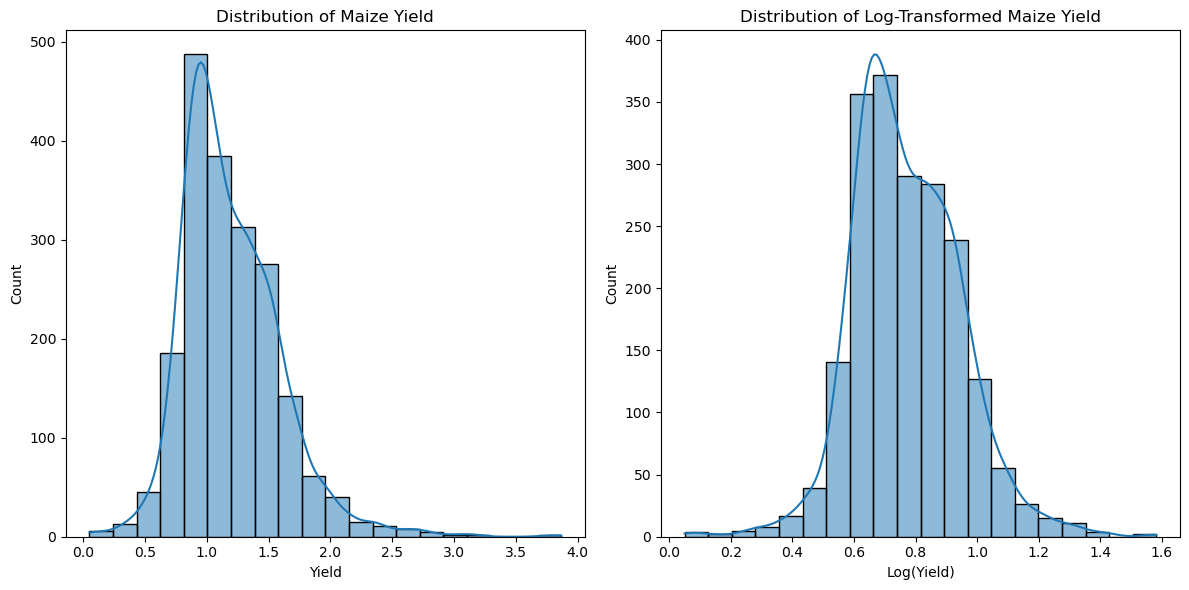

In [189]:
# Task 3.1: Compare the distribution of yields to a log transformation of yields
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(merg_df['value'], bins=20, kde=True)
plt.title('Distribution of Maize Yield')
plt.xlabel('Yield')

plt.subplot(1, 2, 2)
log_yield = np.log1p(merg_df['value'])
sns.histplot(log_yield, bins=20, kde=True)
plt.title('Distribution of Log-Transformed Maize Yield')
plt.xlabel('Log(Yield)')

plt.tight_layout()
plt.savefig('products/yield_distribution_comparison.png')
plt.show()

#### Interpretation of which values to use in the model
- The log-transformed distribution appears more symmetric and closer to a normal distribution compared to the original yield values, which are likely skewed.
- Using the log-transformed values in the model can help stabilize variance and make relationships more linear, which often improves model performance.
- Therefore, the log-transformed yields would be preferable for modeling to address skewness and heteroscedasticity.

# Task 3.2: One-hot encode the location (admin 2) and split the data



In [220]:
X = merg_df.drop(columns=['value', 'unit', 'product', 'season_name', 'season_type'])
y = np.log1p(merg_df['value'])  # Using log-transformed yields

# One-hot encode the 'name_2' column
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(X[['name_2']])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['name_2']))

# Add encoded features back to the features
X = X.drop(columns=['country', 'name_1', 'name_2']).reset_index(drop=True)
X = pd.concat([X, encoded_features_df], axis=1)

# Remove rows with missing values in X or y
X = X.dropna()
y = y[X.index]

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train/validation, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Ridge regression with cross-validation
alphas = np.logspace(-5, 5, 50)
ridge_cv = RidgeCV(alphas=alphas, scoring='r2', cv=10)
ridge_cv.fit(X_train, y_train)

# Calculate and report validation set and test set performance scores
train_r2 = ridge_cv.score(X_train, y_train)
test_r2 = ridge_cv.score(X_test, y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [221]:
print(f'Training R^2 score: {train_r2:.4f}')
print(f'Test R^2 score: {test_r2:.4f}')

Training R^2 score: 0.5038
Test R^2 score: 0.4161


Les résultats montrent un Training R² de 0.5038 et un Test R² de 0.4161. Cela signifie que le modèle explique environ 50 % de la variance du rendement de maïs sur l'ensemble d'entraînement et 41 % sur l'ensemble de test. La légère différence suggère un bon équilibre entre la capacité du modèle à apprendre les données d'entraînement et sa généralisation aux nouvelles données.

- D'autres caractéristiques pourraient être importantes pour expliquer les rendements, par exemple, des variables climatiques (température, précipitations), des caractéristiques du sol, ou des pratiques agricoles.

# Task 3.3: Aggregate data to level 1 and rerun model


In [266]:

# Take the mean of the yield and vegetation features to summarize data at level 1 (name_1)
numeric_columns = merg_df.select_dtypes(include=[np.number]).columns.difference(['year'])
level1_df = merg_df.drop(columns=['country', 'name_2']).groupby(['name_1', 'year'])[numeric_columns].mean().reset_index()

# One-hot encode the 'name_1' column
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(level1_df[['name_1']])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['name_1']))

# Add encoded features back to the features
X_level1 = level1_df.drop(columns=['value', 'name_1']).reset_index(drop=True)
X_level1 = pd.concat([X_level1, encoded_features_df], axis=1)

# Remove rows with missing values in X or y
X_level1 = X_level1.dropna()
y_level1 = np.log1p(level1_df['value'])[X_level1.index]

# Standardize the features
scaler = StandardScaler()
X_level1 = scaler.fit_transform(X_level1)

# Split the level 1 data into training and testing sets (80% train/validation, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_level1, y_level1, test_size=0.2, random_state=45)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [267]:
# Ridge regression with cross-validation
alphas = np.logspace(-5, 5, 10)
ridge_cv = RidgeCV(alphas=alphas, scoring='r2', cv=20)
ridge_cv.fit(X_train, y_train)

# Calculate and report validation set and test set performance scores
train_r2 = ridge_cv.score(X_train, y_train)
test_r2 = ridge_cv.score(X_test, y_test)

print(f'Training R^2 score (level 1): {train_r2:.4f}')
print(f'Test R^2 score (level 1): {test_r2:.4f}')

Training R^2 score (level 1): 0.6553
Test R^2 score (level 1): 0.6419
